In [1]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Database Connection

In [2]:
connection = sqlite3.connect('travel.sqlite')

In [3]:
cursor = connection.cursor()

In [4]:
cursor.execute("""Select name from sqlite_master where type = 'table';""")
print("Tables in Database:")
table_list = []
for tables in cursor.fetchall():
    table_list.append(tables[0])
print(table_list)

Tables in Database:
['aircrafts_data', 'airports_data', 'boarding_passes', 'bookings', 'flights', 'seats', 'ticket_flights', 'tickets']


# Data Exploration

In [5]:
aircrafts_data = pd.read_sql_query("select * from aircrafts_data", connection)
aircrafts_data

,aircraft_code,model,range
0,773,"{""en"": ""Boeing 777-300"", ""ru"": ""Боинг 777-300""}",11100
1,763,"{""en"": ""Boeing 767-300"", ""ru"": ""Боинг 767-300""}",7900
2,SU9,"{""en"": ""Sukhoi Superjet-100"", ""ru"": ""Сухой Суп...",3000
3,320,"{""en"": ""Airbus A320-200"", ""ru"": ""Аэробус A320-...",5700
4,321,"{""en"": ""Airbus A321-200"", ""ru"": ""Аэробус A321-...",5600
5,319,"{""en"": ""Airbus A319-100"", ""ru"": ""Аэробус A319-...",6700
6,733,"{""en"": ""Boeing 737-300"", ""ru"": ""Боинг 737-300""}",4200
7,CN1,"{""en"": ""Cessna 208 Caravan"", ""ru"": ""Сессна 208...",1200
8,CR2,"{""en"": ""Bombardier CRJ-200"", ""ru"": ""Бомбардье ...",2700


In [6]:
airports_data = pd.read_sql_query("select * from airports_data", connection)
airports_data

,airport_code,airport_name,city,coordinates,timezone
0,YKS,"{""en"": ""Yakutsk Airport"", ""ru"": ""Якутск""}","{""en"": ""Yakutsk"", ""ru"": ""Якутск""}","(129.77099609375,62.0932998657226562)",Asia/Yakutsk
1,MJZ,"{""en"": ""Mirny Airport"", ""ru"": ""Мирный""}","{""en"": ""Mirnyj"", ""ru"": ""Мирный""}","(114.03900146484375,62.534698486328125)",Asia/Yakutsk
2,KHV,"{""en"": ""Khabarovsk-Novy Airport"", ""ru"": ""Хабар...","{""en"": ""Khabarovsk"", ""ru"": ""Хабаровск""}","(135.18800354004,48.5279998779300001)",Asia/Vladivostok
3,PKC,"{""en"": ""Yelizovo Airport"", ""ru"": ""Елизово""}","{""en"": ""Petropavlovsk"", ""ru"": ""Петропавловск-К...","(158.453994750976562,53.1679000854492188)",Asia/Kamchatka
4,UUS,"{""en"": ""Yuzhno-Sakhalinsk Airport"", ""ru"": ""Хом...","{""en"": ""Yuzhno-Sakhalinsk"", ""ru"": ""Южно-Сахали...","(142.718002319335938,46.8886985778808594)",Asia/Sakhalin
...,...,...,...,...,...
99,MMK,"{""en"": ""Murmansk Airport"", ""ru"": ""Мурманск""}","{""en"": ""Murmansk"", ""ru"": ""Мурманск""}","(32.7508010864257812,68.7817001342773438)",Europe/Moscow
100,ABA,"{""en"": ""Abakan Airport"", ""ru"": ""Абакан""}","{""en"": ""Abakan"", ""ru"": ""Абакан""}","(91.3850021362304688,53.7400016784667969)",Asia/Krasnoyarsk
101,BAX,"{""en"": ""Barnaul Airport"", ""ru"": ""Барнаул""}","{""en"": ""Barnaul"", ""ru"": ""Барнаул""}","(83.5384979248046875,53.363800048828125)",Asia/Krasnoyarsk
102,AAQ,"{""en"": ""Anapa Vityazevo Airport"", ""ru"": ""Витяз...","{""en"": ""Anapa"", ""ru"": ""Анапа""}","(37.3473014831539984,45.002101898192997)",Europe/Moscow


In [7]:
boarding_passes = pd.read_sql_query("select * from boarding_passes", connection)
boarding_passes

,ticket_no,flight_id,boarding_no,seat_no
0,0005435212351,30625,1,2D
1,0005435212386,30625,2,3G
2,0005435212381,30625,3,4H
3,0005432211370,30625,4,5D
4,0005435212357,30625,5,11A
...,...,...,...,...
579681,0005434302871,19945,85,20F
579682,0005432892791,19945,86,21C
579683,0005434302869,19945,87,20E
579684,0005432802476,19945,88,21F


In [8]:
bookings = pd.read_sql_query("select * from bookings", connection)
bookings

,book_ref,book_date,total_amount
0,00000F,2017-07-05 03:12:00+03,265700
1,000012,2017-07-14 09:02:00+03,37900
2,000068,2017-08-15 14:27:00+03,18100
3,000181,2017-08-10 13:28:00+03,131800
4,0002D8,2017-08-07 21:40:00+03,23600
...,...,...,...
262783,FFFEF3,2017-07-17 07:23:00+03,56000
262784,FFFF2C,2017-08-08 05:55:00+03,10800
262785,FFFF43,2017-07-20 20:42:00+03,78500
262786,FFFFA8,2017-08-08 04:45:00+03,28800


In [9]:
flights = pd.read_sql_query("select * from flights", connection)
flights

,flight_id,flight_no,scheduled_departure,scheduled_arrival,departure_airport,arrival_airport,status,aircraft_code,actual_departure,actual_arrival
0,1185,PG0134,2017-09-10 09:50:00+03,2017-09-10 14:55:00+03,DME,BTK,Scheduled,319,\N,\N
1,3979,PG0052,2017-08-25 14:50:00+03,2017-08-25 17:35:00+03,VKO,HMA,Scheduled,CR2,\N,\N
2,4739,PG0561,2017-09-05 12:30:00+03,2017-09-05 14:15:00+03,VKO,AER,Scheduled,763,\N,\N
3,5502,PG0529,2017-09-12 09:50:00+03,2017-09-12 11:20:00+03,SVO,UFA,Scheduled,763,\N,\N
4,6938,PG0461,2017-09-04 12:25:00+03,2017-09-04 13:20:00+03,SVO,ULV,Scheduled,SU9,\N,\N
...,...,...,...,...,...,...,...,...,...,...
33116,33117,PG0063,2017-08-02 19:25:00+03,2017-08-02 20:10:00+03,SKX,SVO,Arrived,CR2,2017-08-02 19:25:00+03,2017-08-02 20:10:00+03
33117,33118,PG0063,2017-07-28 19:25:00+03,2017-07-28 20:10:00+03,SKX,SVO,Arrived,CR2,2017-07-28 19:30:00+03,2017-07-28 20:15:00+03
33118,33119,PG0063,2017-09-08 19:25:00+03,2017-09-08 20:10:00+03,SKX,SVO,Scheduled,CR2,\N,\N
33119,33120,PG0063,2017-08-01 19:25:00+03,2017-08-01 20:10:00+03,SKX,SVO,Arrived,CR2,2017-08-01 19:26:00+03,2017-08-01 20:12:00+03


In [10]:
seats = pd.read_sql_query("select * from seats", connection)
seats

,aircraft_code,seat_no,fare_conditions
0,319,2A,Business
1,319,2C,Business
2,319,2D,Business
3,319,2F,Business
4,319,3A,Business
...,...,...,...
1334,773,48H,Economy
1335,773,48K,Economy
1336,773,49A,Economy
1337,773,49C,Economy


In [11]:
ticket_flights = pd.read_sql_query("select * from ticket_flights", connection)
ticket_flights

,ticket_no,flight_id,fare_conditions,amount
0,0005432159776,30625,Business,42100
1,0005435212351,30625,Business,42100
2,0005435212386,30625,Business,42100
3,0005435212381,30625,Business,42100
4,0005432211370,30625,Business,42100
...,...,...,...,...
1045721,0005435097522,32094,Economy,5200
1045722,0005435097521,32094,Economy,5200
1045723,0005435104384,32094,Economy,5200
1045724,0005435104352,32094,Economy,5200


In [12]:
tickets = pd.read_sql_query("select * from tickets", connection)
tickets

,ticket_no,book_ref,passenger_id
0,0005432000987,06B046,8149 604011
1,0005432000988,06B046,8499 420203
2,0005432000989,E170C3,1011 752484
3,0005432000990,E170C3,4849 400049
4,0005432000991,F313DD,6615 976589
...,...,...,...
366728,0005435999869,D730BA,0474 690760
366729,0005435999870,D730BA,6535 751108
366730,0005435999871,A1AD46,1596 156448
366731,0005435999872,7B6A53,9374 822707


In [13]:
for table in table_list:
    print(f"\nTable: {table}")
    column_info = connection.execute('PRAGMA table_info({})'.format(table))
    for column in column_info.fetchall():
        print(column[1:3])


Table: aircrafts_data
('aircraft_code', 'character(3)')
('model', 'jsonb')
('range', 'INTEGER')

Table: airports_data
('airport_code', 'character(3)')
('airport_name', 'jsonb')
('city', 'jsonb')
('coordinates', 'point')
('timezone', 'TEXT')

Table: boarding_passes
('ticket_no', 'character(13)')
('flight_id', 'INTEGER')
('boarding_no', 'INTEGER')
('seat_no', 'character varying(4)')

Table: bookings
('book_ref', 'character(6)')
('book_date', 'timestamp with time zone')
('total_amount', 'numeric(10,2)')

Table: flights
('flight_id', 'INTEGER')
('flight_no', 'character(6)')
('scheduled_departure', 'timestamp with time zone')
('scheduled_arrival', 'timestamp with time zone')
('departure_airport', 'character(3)')
('arrival_airport', 'character(3)')
('status', 'character varying(20)')
('aircraft_code', 'character(3)')
('actual_departure', 'timestamp with time zone')
('actual_arrival', 'timestamp with time zone')

Table: seats
('aircraft_code', 'character(3)')
('seat_no', 'character varying(4

In [14]:
for table in table_list:
    table_df = pd.read_sql_query(f"select * from {table}", connection)
    print(table_df.isnull().sum(), "\n")

aircraft_code    0
model            0
range            0
dtype: int64 

airport_code    0
airport_name    0
city            0
coordinates     0
timezone        0
dtype: int64 

ticket_no      0
flight_id      0
boarding_no    0
seat_no        0
dtype: int64 

book_ref        0
book_date       0
total_amount    0
dtype: int64 

flight_id              0
flight_no              0
scheduled_departure    0
scheduled_arrival      0
departure_airport      0
arrival_airport        0
status                 0
aircraft_code          0
actual_departure       0
actual_arrival         0
dtype: int64 

aircraft_code      0
seat_no            0
fare_conditions    0
dtype: int64 

ticket_no          0
flight_id          0
fare_conditions    0
amount             0
dtype: int64 

ticket_no       0
book_ref        0
passenger_id    0
dtype: int64 



# Basic Analysis

#### Q: *How many planes have more than 100 seats?*

In [15]:
seats

,aircraft_code,seat_no,fare_conditions
0,319,2A,Business
1,319,2C,Business
2,319,2D,Business
3,319,2F,Business
4,319,3A,Business
...,...,...,...
1334,773,48H,Economy
1335,773,48K,Economy
1336,773,49A,Economy
1337,773,49C,Economy


In [16]:
pd.read_sql_query('''select aircraft_code, count(*) as num_seats from seats
                    group by aircraft_code having num_seats > 100 
                    ''', connection)

,aircraft_code,num_seats
0,319,116
1,320,140
2,321,170
3,733,130
4,763,222
5,773,402


##### A: *6 Planes have more than 100 seats*

#### Q: *How the number of tickers booked and the amount earned changed with time?*

- Since tickets table contain all the information whereas in booking one person can book many tickets therefore will need both tables

In [17]:
tickets_and_bookings = pd.read_sql_query(''' 
                    select * from tickets 
                    join bookings 
                    on tickets.book_ref = bookings.book_ref
                    order by book_date asc
                    ''', connection)

In [18]:
tickets_and_bookings["book_date"] = pd.to_datetime(tickets_and_bookings["book_date"])
tickets_and_bookings["date"] = tickets_and_bookings["book_date"].dt.date
tickets_and_bookings

,ticket_no,book_ref,passenger_id,book_ref,book_date,total_amount,date
0,0005432628587,61EAC7,0093 271823,61EAC7,2017-06-21 14:05:00+03:00,52000,2017-06-21
1,0005432628588,61EAC7,1700 690956,61EAC7,2017-06-21 14:05:00+03:00,52000,2017-06-21
2,0005434876589,98A065,2496 629437,98A065,2017-06-21 15:48:00+03:00,211100,2017-06-21
3,0005434876590,98A065,4813 255607,98A065,2017-06-21 15:48:00+03:00,211100,2017-06-21
4,0005434876591,98A065,0849 378091,98A065,2017-06-21 15:48:00+03:00,211100,2017-06-21
...,...,...,...,...,...,...,...
366728,0005433193428,12165C,4912 642478,12165C,2017-08-15 18:00:00+03:00,187800,2017-08-15
366729,0005433193429,12165C,8571 520185,12165C,2017-08-15 18:00:00+03:00,187800,2017-08-15
366730,0005433717429,2AFB36,8107 392972,2AFB36,2017-08-15 18:00:00+03:00,21400,2017-08-15
366731,0005434025524,21E611,8877 169201,21E611,2017-08-15 18:00:00+03:00,16400,2017-08-15


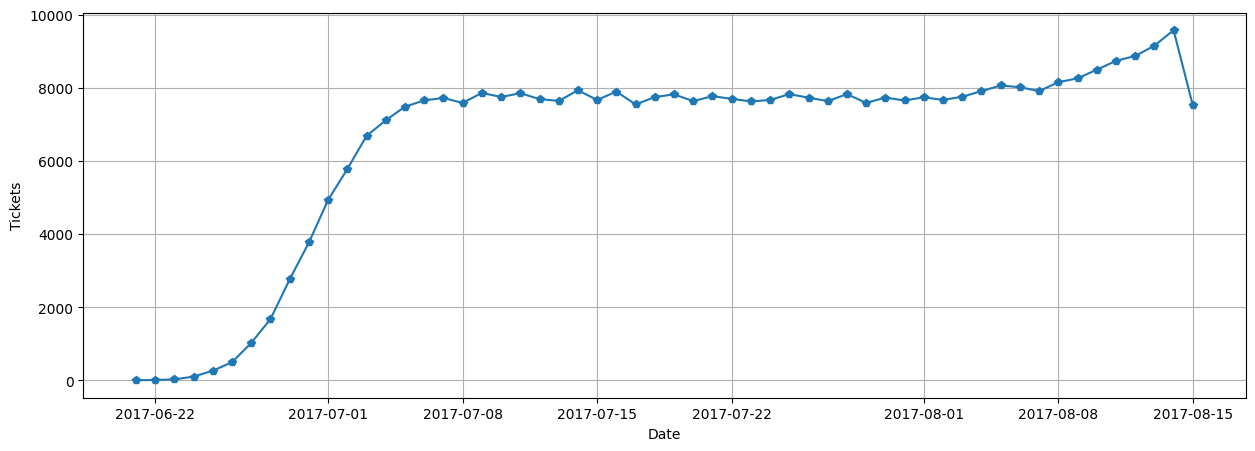

In [19]:
x = tickets_and_bookings.groupby("date")[["date"]].count()
plt.figure(figsize=(15,5))
plt.plot(x.index, x["date"], marker="p")
plt.xlabel("Date")
plt.ylabel("Tickets")
plt.grid('b')
plt.show()

In [20]:
bookings["book_date"] = pd.to_datetime(bookings["book_date"])
bookings["date"] = bookings["book_date"].dt.date

In [21]:
x.head(10)

,date
date,
2017-06-21,6
2017-06-22,12
2017-06-23,28
2017-06-24,106
2017-06-25,266
2017-06-26,499
2017-06-27,1028
2017-06-28,1678
2017-06-29,2765


In [22]:
x = bookings.groupby("date")["total_amount"].sum().reset_index()

In [23]:
x.head()

,date,total_amount
0,2017-06-21,441900
1,2017-06-22,775300
2,2017-06-23,1822000
3,2017-06-24,5977000
4,2017-06-25,15305400


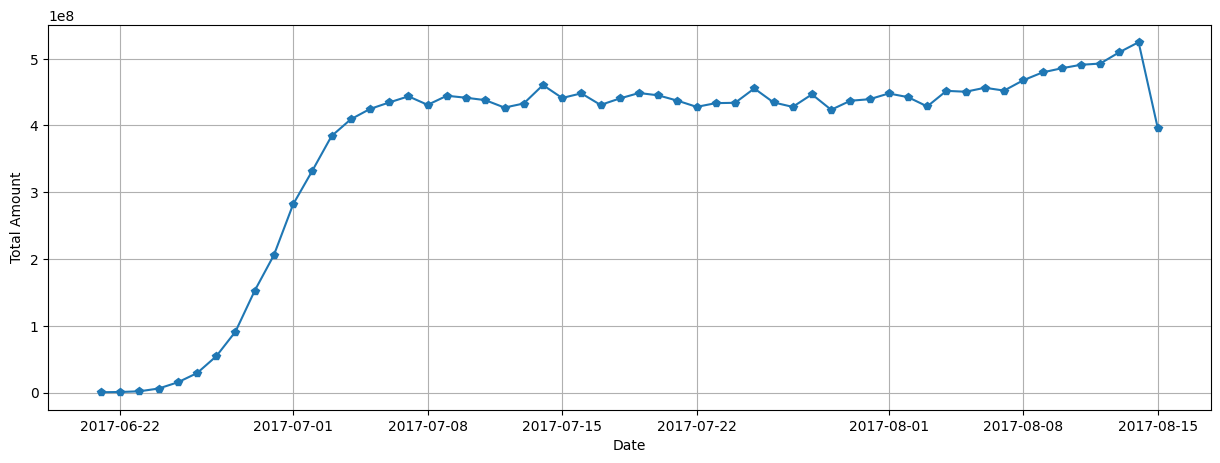

In [24]:
plt.figure(figsize=(15,5))
plt.plot(x["date"], x["total_amount"], marker="p")
plt.xlabel("Date")
plt.ylabel("Total Amount")
plt.grid('b')
plt.show()

#### Q: *Average charges of each aircraft with diifferent fare conditions*

In [25]:
flights

,flight_id,flight_no,scheduled_departure,scheduled_arrival,departure_airport,arrival_airport,status,aircraft_code,actual_departure,actual_arrival
0,1185,PG0134,2017-09-10 09:50:00+03,2017-09-10 14:55:00+03,DME,BTK,Scheduled,319,\N,\N
1,3979,PG0052,2017-08-25 14:50:00+03,2017-08-25 17:35:00+03,VKO,HMA,Scheduled,CR2,\N,\N
2,4739,PG0561,2017-09-05 12:30:00+03,2017-09-05 14:15:00+03,VKO,AER,Scheduled,763,\N,\N
3,5502,PG0529,2017-09-12 09:50:00+03,2017-09-12 11:20:00+03,SVO,UFA,Scheduled,763,\N,\N
4,6938,PG0461,2017-09-04 12:25:00+03,2017-09-04 13:20:00+03,SVO,ULV,Scheduled,SU9,\N,\N
...,...,...,...,...,...,...,...,...,...,...
33116,33117,PG0063,2017-08-02 19:25:00+03,2017-08-02 20:10:00+03,SKX,SVO,Arrived,CR2,2017-08-02 19:25:00+03,2017-08-02 20:10:00+03
33117,33118,PG0063,2017-07-28 19:25:00+03,2017-07-28 20:10:00+03,SKX,SVO,Arrived,CR2,2017-07-28 19:30:00+03,2017-07-28 20:15:00+03
33118,33119,PG0063,2017-09-08 19:25:00+03,2017-09-08 20:10:00+03,SKX,SVO,Scheduled,CR2,\N,\N
33119,33120,PG0063,2017-08-01 19:25:00+03,2017-08-01 20:10:00+03,SKX,SVO,Arrived,CR2,2017-08-01 19:26:00+03,2017-08-01 20:12:00+03


In [26]:
ticket_flights

,ticket_no,flight_id,fare_conditions,amount
0,0005432159776,30625,Business,42100
1,0005435212351,30625,Business,42100
2,0005435212386,30625,Business,42100
3,0005435212381,30625,Business,42100
4,0005432211370,30625,Business,42100
...,...,...,...,...
1045721,0005435097522,32094,Economy,5200
1045722,0005435097521,32094,Economy,5200
1045723,0005435104384,32094,Economy,5200
1045724,0005435104352,32094,Economy,5200


In [27]:
flights_and_ticket = pd.read_sql_query(''' 
select aircraft_code, fare_conditions, avg(amount)
from ticket_flights 
join flights 
on flights.flight_id = ticket_flights.flight_id
group by aircraft_code, fare_conditions
''', connection)

In [28]:
flights_and_ticket

,aircraft_code,fare_conditions,avg(amount)
0,319,Business,113550.557703
1,319,Economy,38311.402347
2,321,Business,34435.662664
3,321,Economy,11534.974764
4,733,Business,41865.626175
5,733,Economy,13985.152000
6,763,Business,82839.842866
7,763,Economy,27594.721829
8,773,Business,57779.909435
9,773,Comfort,32740.552889


<Axes: xlabel='aircraft_code', ylabel='avg(amount)'>

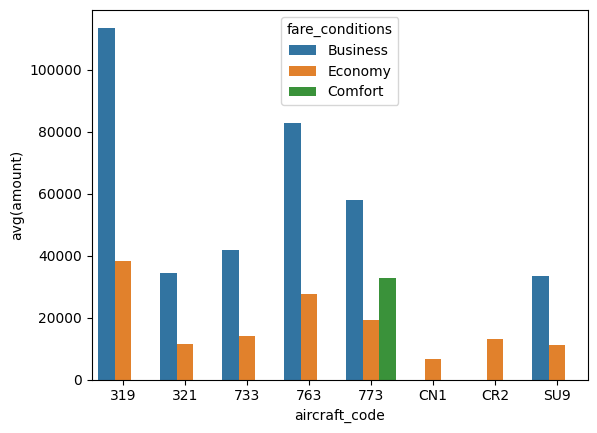

In [29]:
sns.barplot(data=flights_and_ticket, x='aircraft_code', y='avg(amount)', hue='fare_conditions')

## Analyzing occupancy rate

#### Q: *For each aircraft calculate the total revenue per year and average revenue per ticket*

In [30]:
ticket_flights.head()

,ticket_no,flight_id,fare_conditions,amount
0,0005432159776,30625,Business,42100
1,0005435212351,30625,Business,42100
2,0005435212386,30625,Business,42100
3,0005435212381,30625,Business,42100
4,0005432211370,30625,Business,42100


In [31]:
flights.head()

,flight_id,flight_no,scheduled_departure,scheduled_arrival,departure_airport,arrival_airport,status,aircraft_code,actual_departure,actual_arrival
0,1185,PG0134,2017-09-10 09:50:00+03,2017-09-10 14:55:00+03,DME,BTK,Scheduled,319,\N,\N
1,3979,PG0052,2017-08-25 14:50:00+03,2017-08-25 17:35:00+03,VKO,HMA,Scheduled,CR2,\N,\N
2,4739,PG0561,2017-09-05 12:30:00+03,2017-09-05 14:15:00+03,VKO,AER,Scheduled,763,\N,\N
3,5502,PG0529,2017-09-12 09:50:00+03,2017-09-12 11:20:00+03,SVO,UFA,Scheduled,763,\N,\N
4,6938,PG0461,2017-09-04 12:25:00+03,2017-09-04 13:20:00+03,SVO,ULV,Scheduled,SU9,\N,\N


In [32]:
tickets_and_flights = pd.read_sql_query('''
select aircraft_code, count(*) as ticket_count, sum(amount) as total_revenue, sum(amount)/count(*) as average_revenue_per_ticket from ticket_flights
join flights
on ticket_flights.flight_id = flights.flight_id
group by aircraft_code
''', connection)

In [33]:
tickets_and_flights.head(10)

,aircraft_code,ticket_count,total_revenue,average_revenue_per_ticket
0,319,52853,2706163100,51201
1,321,107129,1638164100,15291
2,733,86102,1426552100,16568
3,763,124774,4371277100,35033
4,773,144376,3431205500,23765
5,CN1,14672,96373800,6568
6,CR2,150122,1982760500,13207
7,SU9,365698,5114484700,13985


#### Q: *Average occupancy per aircraft*

In [34]:
boarding_passes.head()

,ticket_no,flight_id,boarding_no,seat_no
0,0005435212351,30625,1,2D
1,0005435212386,30625,2,3G
2,0005435212381,30625,3,4H
3,0005432211370,30625,4,5D
4,0005435212357,30625,5,11A


In [35]:
flights.head()

,flight_id,flight_no,scheduled_departure,scheduled_arrival,departure_airport,arrival_airport,status,aircraft_code,actual_departure,actual_arrival
0,1185,PG0134,2017-09-10 09:50:00+03,2017-09-10 14:55:00+03,DME,BTK,Scheduled,319,\N,\N
1,3979,PG0052,2017-08-25 14:50:00+03,2017-08-25 17:35:00+03,VKO,HMA,Scheduled,CR2,\N,\N
2,4739,PG0561,2017-09-05 12:30:00+03,2017-09-05 14:15:00+03,VKO,AER,Scheduled,763,\N,\N
3,5502,PG0529,2017-09-12 09:50:00+03,2017-09-12 11:20:00+03,SVO,UFA,Scheduled,763,\N,\N
4,6938,PG0461,2017-09-04 12:25:00+03,2017-09-04 13:20:00+03,SVO,ULV,Scheduled,SU9,\N,\N


In [36]:
pd.read_sql_query('''
select aircraft_code, flights.flight_id, count(*) as seat_counts from boarding_passes
join flights on
boarding_passes.flight_id = flights.flight_id
group by aircraft_code, flights.flight_id
''', connection)

,aircraft_code,flight_id,seat_counts
0,319,1162,51
1,319,1166,54
2,319,1167,57
3,319,1168,60
4,319,1170,58
...,...,...,...
11513,SU9,32925,12
11514,SU9,32928,25
11515,SU9,32931,12
11516,SU9,32933,16


In [37]:
pd.read_sql_query("select aircraft_code, count(*) as num_seats from seats group by aircraft_code;", connection)

,aircraft_code,num_seats
0,319,116
1,320,140
2,321,170
3,733,130
4,763,222
5,773,402
6,CN1,12
7,CR2,50
8,SU9,97


In [38]:
#Merging both tables
occupancy_rate = pd.read_sql_query('''
select a.aircraft_code, avg(a.seat_counts) as booked_seats, b.num_seats, avg(a.seat_counts)/b.num_seats as occupancy_rate from
(select aircraft_code, flights.flight_id, count(*) as seat_counts from boarding_passes
join flights on
boarding_passes.flight_id = flights.flight_id
group by aircraft_code, flights.flight_id) 
as a
inner join
(select aircraft_code, count(*) as num_seats from seats group by aircraft_code) 
as b
on a.aircraft_code = b.aircraft_code group by a.aircraft_code;
''', connection)

In [39]:
occupancy_rate['inc_occupancy_rate'] = occupancy_rate['occupancy_rate'] + occupancy_rate['occupancy_rate'] * 0.1

In [40]:
occupancy_rate

,aircraft_code,booked_seats,num_seats,occupancy_rate,inc_occupancy_rate
0,319,53.583181,116,0.461924,0.508116
1,321,88.809231,170,0.522407,0.574648
2,733,80.255462,130,0.617350,0.679085
3,763,113.937294,222,0.513231,0.564554
4,773,264.925806,402,0.659019,0.724921
5,CN1,6.004431,12,0.500369,0.550406
6,CR2,21.482847,50,0.429657,0.472623
7,SU9,56.812113,97,0.585692,0.644261


In [41]:
total_revenue = pd.read_sql_query('''
SELECT aircraft_code, sum(amount) as total_revenue FROM ticket_flights
JOIN flights
ON ticket_flights.flight_id = flights.flight_id
GROUP BY aircraft_code
''', connection)
total_revenue

,aircraft_code,total_revenue
0,319,2706163100
1,321,1638164100
2,733,1426552100
3,763,4371277100
4,773,3431205500
5,CN1,96373800
6,CR2,1982760500
7,SU9,5114484700


In [42]:
occupancy_rate

,aircraft_code,booked_seats,num_seats,occupancy_rate,inc_occupancy_rate
0,319,53.583181,116,0.461924,0.508116
1,321,88.809231,170,0.522407,0.574648
2,733,80.255462,130,0.617350,0.679085
3,763,113.937294,222,0.513231,0.564554
4,773,264.925806,402,0.659019,0.724921
5,CN1,6.004431,12,0.500369,0.550406
6,CR2,21.482847,50,0.429657,0.472623
7,SU9,56.812113,97,0.585692,0.644261


In [43]:
occupancy_rate["inc_total_annual_turnover"] = (total_revenue["total_revenue"]/occupancy_rate["occupancy_rate"]) * occupancy_rate["inc_occupancy_rate"]

In [44]:
pd.set_option("display.float_format",str)

In [45]:
occupancy_rate

,aircraft_code,booked_seats,num_seats,occupancy_rate,inc_occupancy_rate,inc_total_annual_turnover
0,319,53.58318098720292,116,0.46192397402761143,0.5081163714303726,2976779410.0
1,321,88.80923076923077,170,0.5224072398190045,0.574647963800905,1801980510.0
2,733,80.25546218487395,130,0.617349709114415,0.6790846800258565,1569207310.0000002
3,763,113.93729372937294,222,0.5132310528350132,0.5645541581185146,4808404810.0
4,773,264.9258064516129,402,0.659019419033863,0.7249213609372492,3774326050.0
5,CN1,6.004431314623338,12,0.5003692762186115,0.5504062038404727,106011180.00000001
6,CR2,21.48284690220174,50,0.42965693804403476,0.4726226318484382,2181036550.0
7,SU9,56.81211267605634,97,0.5856918832583128,0.644261071584144,5625933169.999999
